# Lab Course Structural Dynamics - Notebook Template
This Notebook contains all tasks for the Lab Course Structural Dynamics. 
Check out the tutorial notebooks to solve the tasks!
### Task Overview

The given tasks in this course are: <a id='0'></a>
1. [Modelling,Meshing,Preprocessing](#1)   
    1.0. [Import, Default Meshing](#1.0)   
    1.1. [Implementation - Impose Fixation](#1.1)    
    1.2. [Impose Boundary Conditions](#1.2)  
    1.3. [Time vs. Accuracy](#1.3)  
    1.4. [Model Additional Beams](#1.4)  
2. [Static Solver](#2)    
    2.1. [Implementation - Inverse and Factorization](#2.1)   
    2.2. [Forces, Boundary Condiditons and Deflections](#2.2)    
    2.3. [Accuracy and Residuals](#2.3)   
    2.4. [Computational Efficiency](#2.4)   
3. [Eigensolver](#3)   
    3.1. [Implementation - Power Iteration & Krylov Subspace](#3.1)  
    3.2. [Deflection  & Boundary Conditions](#3.2)      
    3.3. [Error Measurement](#3.3)      
    3.4. [Efficiency & Convergence](#3.4)      
    3.5. [Shift](#3.5)      
    3.6. [Rigid Body Modes](#3.6)      
4. [Harmonic Solver](#4)  
    4.1. [Implementation - Direct Solver, Modal Truncation & Mode Acceleration](#4.1)  
    4.2. [Calculate and Visualize](#4.2)   
    4.3. [Error Measurement](#4.3)   
    4.4. [Efficieny and Possible Speed-Ups](#4.4)   
    4.5. [Static Consistency](#4.5)   
5. [Transient Solver](#5)  
    5.1. [Implementation - Linear Newmark Integration, Max Omega  Stability Limits](#5.1)    
    5.2. [Compare Results](#5.2)   
    5.3. [Time Step and Stability](#5.4)    
    5.4. [Damping](#5.5)    
    5.5. [Static Consistency](#5.6)  
    
The tasks can also be divided in three groups:
1. Complete the LSDstudent package. This corresponds to the first task in each section. Gaps appear in these methods:
    - __truncate()__ of the __MK__ class
    - __Inverse()__ and __Factorization()__ of the __StaticSolver__ class
    - __MaxOmega()__, __DirectHarmonics()__,  __ModalSuperposition()__ and __ModeAcceleration()__   of the __HarmonicSolver__ class 
    - __stabilityLimits()__ and __LinearNewmarkIntegration()__ of the __TransientSolver__ class
        
        
2. Answer further tasks in this notebook using the completed functions! 
    > Hint: if you are stuck with the implementation of one of the function of part 1, temporarily use the compiled package!

3. Document the basic theory, your results and discussion in this notebook!

    

## Modelling, Meshing, Preprocessing <a id='1'></a>
[Back to Top](#0)

#### 1.0. Import, Default Meshing <a id='1.0'></a> [Back to Top $\uparrow$](#0)

The first step is to load and generate the hangar model. Use the following information:
- Include the required import statements
- The keypoints are stored in 'HangarKeypoints.txt'
- The lines are stored in 'HangarLines.txt'
- Use 4 nodes per line to discretize the geometry
- Assemble the mass and stiffness matrix
- This is the default number of point per line. Use this, if not specified differently. 

> Hint: hints can be found in __lsd_tutorial_notebook__


Python was not able to load the fast fortran assembly routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element routines.
Python was not able to load the fast fortran element r

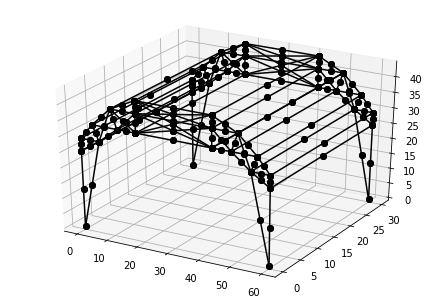

In [1]:
import os # Package to control operation system
import time # Time measurement
import numpy as np # Arrays and linear algebra
from matplotlib import pyplot as plt # Package for plots and visualization
import plotly.graph_objects as go
import inspect
working_path = os.getcwd();
# Change working path, otherwise the LSD packages cannot be found
os.chdir(working_path) 
# Import Preprocessing and Solver module from the LSDcompiled package
import LSD.Preprocessing  as Prep 
import LSD.Solver as Sol


KeypointFile    = os.getcwd()+"/Mesh/HangarKeypoints.txt"
LineFile        = os.getcwd()+"/Mesh/HangarLines.txt"
HangarGeo = Prep.LineGeometry(KeypointFile,LineFile) # Class LineGeometry
HangarGeo.LineNodes = [3] 
HangarGeo.discretizeLineGeometry()
HangarGeo.plotLineElements()
MKfree= HangarGeo.assembleLineElements() # MKfree is an MK class


#### 1.1. Implementation - Impose Fixation <a id='1.1'></a> [Back to Top $\uparrow$](#0)
Complete the implementation of Preprocessing.MK.truncate() in order to fix boundaries. Regard the rules for matrix operations with the numpy package. See __python_tutorial_notebook__ for furhter information. Compare your implementation to the compiled reference. For example, you can compare the dimensions of the resulting mass and stiffness matrix for arbitrary boundary conditions.

In [2]:
Coords = np.array([[0,0,0]]) # Define a point in 3D, two points: np.array([[0,0,0],[0,0,0]])
fixDof, freeDof = MKfree.Map.getByCoords(Coords) # Get the associated, and not dof
# notice: the matrices(M K) are sparse(csr_matrix)
MKfix = MKfree.truncate(fixDof,freeDof) # Fix the structure on these dof
# print(MKfix.M)

> Results

#### 1.2.Impose Boundary Conditions <a id='1.2'></a> [Back to Top](#0)
Impose three different boundary condition configurations.
    
   - Fix all dof on the four bottom keypoints. (Boundary Configuration 1)
   - Fix all dof on the two bottom keypoints in the back at y=30. (Boundary Configuration 2)
   - Fix all dof on the two bottom keypoints in the back at y=30 and fix the translational $z$ direction of the two keypoints in the front. (Boundary Configuration 3)
   
> __If not specified differently Boundary Configuration 1 is used as default for all subsequent tasks!__

Calculate the first ten eigenmodes of the hangar structure with the different boundary conditions. 
Use the __ScipySparse()__ method. Compare the eigenfrequencies in one plot. Additionally compare the first mode shape of each boundary configuration by visualization. 

In [52]:

# BC1
Coords_1 = np.array([[0,0,0],[60,0,0],[60,30,0],[0,30,0]]) 
fixDof_1, freeDof_1 = MKfree.Map.getByCoords(Coords_1)
MKfix_1 = MKfree.truncate(fixDof_1,freeDof_1) 
SolverFix_1 = Sol.Solver(MKfix_1.M,MKfix_1.K) 
omegaFix_1, modesFix_1 = SolverFix_1.Eigen.ScipySparse(10)
# BC2
Coords_2 = np.array([[60,30,0],[0,30,0]]) 
fixDof_2, freeDof_2 = MKfree.Map.getByCoords(Coords_2)
MKfix_2 = MKfree.truncate(fixDof_2,freeDof_2) 
SolverFix_2 = Sol.Solver(MKfix_2.M,MKfix_2.K) 
omegaFix_2, modesFix_2 = SolverFix_2.Eigen.ScipySparse(10)
# BC3
### Notice: MKfix_3.R should always have the same row size as that of MKfree.M/K.
### So as to say,MKfix_3.R.shape[0] = MKfree.M.shape[0] holds.
### We need to get the complete fixDof_3 and freeDof_3 before truncation,
### so take the union for fixDof and take the intersection for freeDof
Coords_3_all = np.array([[60,30,0],[0,30,0]]) 
fixDof_3_all, freeDof_3_all = MKfree.Map.getByCoords(Coords_3_all)
Coords_3_z = np.array([[0,0,0],[60,0,0]]) 
fixDof_3_z, freeDof_3_z = MKfree.Map.getByCoords(Coords_3_z,direction = 'z')
fixDof_3 = np.hstack((fixDof_3_all, fixDof_3_z))  # Take the union for fixDof
freeDof_3 = np.array(list(set(freeDof_3_all).intersection(set(freeDof_3_z))))  # Take the intersection for freeDof
MKfix_3 = MKfree.truncate(fixDof_3,freeDof_3)
SolverFix_3 = Sol.Solver(MKfix_3.M,MKfix_3.K)
omegaFix_3, modesFix_3 = SolverFix_3.Eigen.ScipySparse(10)

# plot eigenfrequencies
%matplotlib 
fig_eigfreq = plt.figure()
plt.plot(omegaFix_1,color="blue",label="BC1",)  
plt.plot(omegaFix_2,color="green",label="BC2",)
plt.plot(omegaFix_3,color="red",label="BC3",)
plt.legend()
plt.grid()
# plot the 1st eigenmode of the 3 BCs
fig_eigmode = plt.figure()
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
HangarGeo.plotDisplacementLine(MKfix_1.R @ modesFix_1[:,0],axis=ax1)
HangarGeo.plotDisplacementLine(MKfix_2.R @ modesFix_2[:,0],axis=ax2)
HangarGeo.plotDisplacementLine(MKfix_3.R @ modesFix_3[:,0],axis=ax3)


/home/jimmyyang/anaconda3/envs/PSD/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:296: SparseEfficiencyWarning:

splu requires CSC matrix format



Using matplotlib backend: Qt5Agg


/home/jimmyyang/anaconda3/envs/PSD/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning:

Casting complex values to real discards the imaginary part



> Results

#### 1.3. Time vs. Accuracy <a id='1.3'></a> [Back to Top](#0)
In many cases, the trade off between required computation time and achieved accuracy
is a decisive, yet complex issue. This naturally extends to 
the spatial discretization of finite element models. The finer the mesh, the more accurate the solution. 
However, the coarser the mesh the faster the computations due to smaller matrices. What is a meaningful discretization 
of the beams which are used to model the hangar? Increase the number of points per line sucessively by one point up to 5 points per line! Start with the smallest possible number. Use Boundary Configuration 1 to fix the structure for each meshing,  calculate the first 200 modes and measure the computation time. Compare the resulting eigenfrequencies and the required compuational effort! What does the result tell you?

Text(0, 0.5, 'time consumed /s')

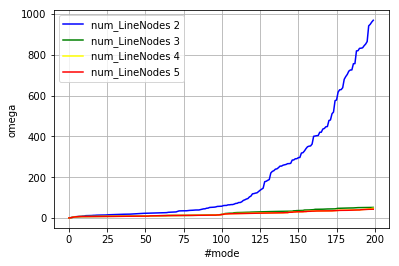

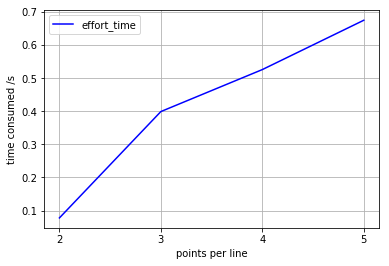

In [84]:
import time
# t_start = time.perf_counter()
# t_end = time.perf_counter()
# period = t_end - t_start
KeypointFile    = os.getcwd()+"/Mesh/HangarKeypoints.txt"
LineFile        = os.getcwd()+"/Mesh/HangarLines.txt"

effort_time = []

PointsPerLine_min = 2
PointsPerLine_max = 5
color_list = ["blue","green","yellow","red"]
%matplotlib inline
fig_frequency = plt.figure()
for num_LineNodes in range(PointsPerLine_min,PointsPerLine_max+1):
    HangarGeo = Prep.LineGeometry(KeypointFile,LineFile) # Class LineGeometry
    HangarGeo.LineNodes = [num_LineNodes] 
    HangarGeo.discretizeLineGeometry()
#     HangarGeo.plotLineElements()
    MKfree= HangarGeo.assembleLineElements() # MKfree is an MK class
    # use BC1
    Coords = np.array([[0,0,0],[60,0,0],[60,30,0],[0,30,0]]) 
    fixDof, freeDof = MKfree.Map.getByCoords(Coords_1)
    MKfix = MKfree.truncate(fixDof,freeDof) 
    SolverFix = Sol.Solver(MKfix.M,MKfix.K) 
    t_start = time.perf_counter()
    omegaFix, modesFix = SolverFix.Eigen.ScipySparse(200)
    t_end = time.perf_counter()
    # plot the frequncies
    plt.plot(omegaFix, color=color_list[num_LineNodes-PointsPerLine_min],
             label="num_LineNodes "+str(num_LineNodes))  
    effort_time.append(t_end - t_start)
plt.legend()
plt.grid()
plt.xlabel("#mode")
plt.ylabel("omega")

# plot the time used in calculating frequencies and eigenmodes
fig_effort = plt.figure()
plt.plot(range(PointsPerLine_min,PointsPerLine_max+1), effort_time, color="blue",label="effort_time")  
plt.legend()
plt.xticks(range(PointsPerLine_min,PointsPerLine_max+1))
plt.grid()
plt.xlabel("points per line")
plt.ylabel("time consumed /s")

# The FEM method is making the object "stiffer"(causing higer eigenfrequency, especially for high frequencies)
# than it is. Thus theoretically with more nodes we could better simulate the behavior of the object.
# We could see with the growth of number of points per line, the frequency becomes lower(higher accuracy)
# and the effort time becomes larger. However, in the condition of 3 points per line the accuracy could
# be enough because for number of points per line larger than 3 the accuracy doesn't increase obviously, but
# the time consumed is still increasing rapidly. So, 3 points per line would be a good choice.
    
    

> Results

#### 1.4. Additional Beams  <a id='1.4'></a> [Back to Top](#0)
In general, the design of a structure is not given. Finite element models are frequently used to perform design studies, in order to figure out an optimal way to build a structure, before its actual physical assembly. For the hangar model, an alternative construction with several additional beams was designed. Load the keypoints and lines from the associated text files! 

- The keypoints are the same
- The lines are stored in 'HangarLinesAddedBeam.txt'

The main goal of the new design is to increase the lower eigenfrequencies of the hangar. Calculate the first ten modes of the hangar using the __ScipySparse()__ method. Compare the eigenfrequencies to the default configuration! Is the design successful - aka. are the lower eigenfrequencies higher? Assess the situation! Can all modes be compared one-to-one?

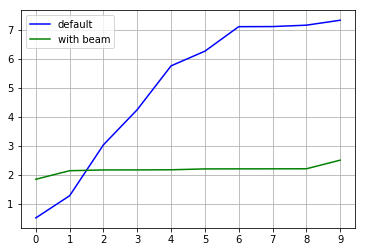

In [91]:
KeypointFile = os.getcwd()+"/Mesh/HangarKeypoints.txt"
LineFile = os.getcwd()+"/Mesh/HangarLines.txt"
LineFile_beam = os.getcwd()+"/Mesh/HangarLinesAddedBeam.txt"

Coords = np.array([[0,0,0],[60,0,0],[60,30,0],[0,30,0]]) 

# Original HangarGeo
HangarGeo = Prep.LineGeometry(KeypointFile,LineFile) 
HangarGeo.LineNodes = [3] 
HangarGeo.discretizeLineGeometry()
MKfree = HangarGeo.assembleLineElements() 
fixDof, freeDof = MKfree.Map.getByCoords(Coords)
MKfix = MKfree.truncate(fixDof,freeDof)
SolverFix = Sol.Solver(MKfix.M,MKfix.K) 
omegaFix, modesFix = SolverFix.Eigen.ScipySparse(10)
# HangarGeo with beam
HangarGeo_beam = Prep.LineGeometry(KeypointFile,LineFile_beam) 
HangarGeo_beam.LineNodes = [3] 
HangarGeo_beam.discretizeLineGeometry()
MKfree_beam= HangarGeo_beam.assembleLineElements() 
fixDof_beam, freeDof_beam = MKfree_beam.Map.getByCoords(Coords)
MKfix_beam = MKfree_beam.truncate(fixDof_beam,freeDof_beam)
SolverFix_beam = Sol.Solver(MKfix_beam.M,MKfix_beam.K) 
omegaFix_beam, modesFix_beam = SolverFix_beam.Eigen.ScipySparse(10)

# plot the eigenfrequencies
%matplotlib inline
fig_eigfreq = plt.figure()
plt.plot(omegaFix,color="blue",label="default",)  
plt.plot(omegaFix_beam,color="green",label="with beam",)
plt.xticks(range(0,10))
plt.grid()
plt.legend()

# The lowest frequency is for sure increased. If we compare the frequencies one-to-one, the first 2 frequencies are 
# increased. But the rest of the eigenfrequencies are decreased. However, the modes can not be compared one-to-one 
# because if we add some beams to the structure, more modes could also be added. So, the modes of the default
# structure and the modes of the structure with beam are not strictly in a one-to-one relationship.

> Results

## Static Solver: $x= K ^{-1} f$ 
[Back to Top](#0)

#### 2.1. Implementation - Inverse and Factorization <a id='2.1'></a> [Back to Top](#0)
Complemete the implementation of the two functions Solver.StaticSolver.Inverse() and Solver.StaticSolver.Factorization().
Apply the same force in positive $y$ direction on each of the four upmost keypoints of the hangar. Use a reasonable magnitude. Plot the calculated displacement for both methods.

> Results

#### 2.2. Forces, Boundary Condiditons and Defelections <a id='2.2'></a> [Back to Top](#0)
Apply the same load as in task 2.1. for all boundary configurations of task 1.2. Plot the displacement! Does the size of the load still make sense? Rescale the magnitude of the load for each function, if necessary!

> Results

#### 2.3.  Accuracy and Residuals <a id='2.3'></a> [Back to Top](#0)
One very important question for the solution of each equation is: how accurate is it? Since closed analytical expression are available for only a few, academic cases. One option is to compare the solution of a new algorithm to an existing reference solution. But how accurate is this reference? 

To circument a vicious circle, residuals can be used. This means, that the equation which should be solved in the first place is used to calculate an error. This error is a measure which can be used to assess all solution algorithms. For a given solution $x_{\text{static}}$ to the static problem the residual vector $r$ is defined like: 

$ r = K x_{\text{static}} -f$ 

Where $f$ is the applied load. Use the $\mathcal{L}_2$ norm to calculate one scalar error measure from the static residual! Compare the factorization and inversion using this measure!

> Results

#### 2.4.  Computational Efficiency <a id='2.4'></a> [Back to Top](#0)
Compare the required time when using the inverse and the factorization of the stiffness matrix. Distinguish online and offline costs: 
- Offline costs is the time required to calculate the inverse or the factorization.
- Online costs is the time required to solve the equation system. 

In case you have to solve for many different static load cases, does the calculation of an inverse makes sense? 

The input N in Solver.StaticSolver.Inverse() and Solver.StaticSolver.Factorization() is used to measure the average offline and online costs by repeating the calculations N times. You can use this to get a more stable measure of the required time. However, the more repetitions, the longer the calculation. 

## Eigensolver: $(K-\omega^2 M)x =0$
[Back to Top](#0)

#### 3.1. Implementation - Power Iteration & Krylov Subspace <a id='3.1'></a> [Back to Top](#0)
Complete the template for both functions Solver.Eigensolver.PowerIteration() and Solver.Eigensolver.KrylovSubspace(). Use a relative termination criterion which tracks the convergence of the eigenvalues for both algorithms. 

#### 3.2.   Deflection & Boundary Conditions  <a id='3.2'></a> [Back to Top](#0)
Calculate the first 20 modes. Using __ScipySparse()__, __PowerIteration()__ and __KrylovSubspace()__. Plot the resulting eigenvalues of all methods in one figure! Can you see any difference? Plot the difference of the __PowerIteration()__ and __KrylovSubspace()__ in another figure using the __ScipySparse()__ as reference.

> Results

#### 3.3. Error Measurement <a id='3.3'></a> [Back to Top](#0)
In the previous section the concept of residuals was introduced. Extend the idea to quantify the accuracy of the solution of the eigenproblem for all solvers! Plot the residual for the first 20 modes of ScipySparse(), PowerIteration() and KrylovSubspace()!

#### 3.4. Efficiency & Convergence <a id='3.4'></a> [Back to Top](#0)
The used methods to solve the eigenproblem are iterative methods. This means that a termination criterion is used to stop the calculation. Again, a trade off between accuracy and computation time is encountered. Change the termination criterion of the PowerIteration and the KrylovSubspace method. Calculate the first 20 modes and their residuals; measure the required computation time! Is there a meaningful trade-off?

> Results

#### 3.5. Shift <a id='3.5'></a> [Back to Top](#0)
Shifts can be used to target certain frequencies. Apply the following shifts:
- Case 1: shift equal to the second eigenfreqeuncy. 
- Case 2: shift close to the second eigenfreqeuncy. Above or below.
- Case 3: shift exactly between the second and the third eigenfrequency.

Calculate __one__ mode using the three shifts using the PowerIteration() and KrylovSubspace() method. Which modes are calculated? Can you explain the results?

#### 3.6. Rigid Body Modes <a id='3.6'></a> [Back to Top](#0)
Consider the free-free system, no dirichlet constraints are applied. Calculate the first ten eigenfrequencies. Use the ScipySparse(), PowerIteration() and KrylovSubspace() method. Plot the resulting eigenfrequencies! Compare the results to your expectation!

## Harmonic Solver: $Y(\omega) = (K-\omega^2 M)^{-1}$
<a id='4'></a>[Back to Top](#0)


#### 4.1. Implementation - Direct Solver, Modal Truncation & Mode Acceleration <a id='4.1'></a> [Back to Top](#0)
Implement the direct solver Solver.HarmonicSolver.DirectHarmonics(). Complete the implementation of the modal truncation method in Solver.HarmonicSolver.ModalSuperposition() and the implementation of the mode acceleration method in Solver.HarmonicSolver.ModeAcceleration(). Compare the results of both methods to the result of the direct method.

Only use the following in- and outputs to generate the FRF plot: 
- Input is applied in $y$ direction at point $[18,0, 44]$.
- Output is in $x$ direction at point $[42,30, 44]$.
How many peaks do you expect in the frequency range $\omega \in [0, 5] $ ? Compare the result with the solution of the eigenproblem. 



> Results

#### 4.2.  Calculate and Visualize <a id='4.2'></a> [Back to Top](#0)
Visualize the amplitude of the harmonic motion of the entire hangar structure, for a frequency close to the first eigenfrequency! Use the direct solution and the load case described in task 4.1. Scale the movement to acquire a reasonable plot! Why is the harmonic motion at this frequency so large?

> Results

#### 4.3. Error Measurement <a id='4.3'></a> [Back to Top](#0)
Calculate the error of the Modal Superposition and the Mode Acceleration method. Use the Direct Solver as reference. Why is it reasonable to use this as a reference solution? Don't we need a residual? Plot the error over the frequency! Use the in- and output of 4.1.

#### 4.4. Efficiency and Possible Speed-Ups <a id='4.4'></a> [Back to Top](#0)
Comapre the required computation time of all strategies. Are there possible speed-ups if only a limited number of in and outputs are of interest?

#### 4.5. Static Consistency  <a id='4.5'></a> [Back to Top](#0)
Regarding the static solver, what does static consistency mean for the harmonic solver? Do the methods yield the same static results? Varify your expectation by solving the related static problem with a static solver of your choise. 

## Transient Solver: $x(t) = \int_t^{t+\Delta t} \int_t^{t+\Delta t} \ddot x (\tau) d\tau$ 
[Back to Top](#0)

#### 5.1.  Implementation - Linear Newmark Integration <a id='5.1'></a> [Back to Top](#0)
Complete the Newmark Integration Scheme in Solver.TransientSolver.LinearNewmarkIntegration(). Addtitionally, the methods Solver.TransientSolver.stabilityLimits() and Solver.Eigensolver.MaxOmega() lack some lines of code - add them!

#### 5.2. Compare results <a id='5.2'></a> [Back to Top](#0)
Use the same input and output degree of freedom as in task 4.1. Use the function createLoad() to apply an arbitrary forcing term. You can study the implementation of createLoad(), for available load shapes or design one on your own. 

Use a time step $\Delta t = 10^{-5}s $ and a total time length $T =0.1s $. Compare the results of all integration schemes! Do instabilities occur?

> Results

#### 5.3. Time Step and Stability <a id='5.4'></a> [Back to Top](#0)
Complete the function Solver.Eigensolver.MaxOmega() and the function Solver.TransientSolver.stabilityLimits(). Validate the stability limits by actual integration! Use the following workflow:
1. Choose your integration scheme. (Not purely explicit, not Average Constant Acceleration.)
2. Design a load with an potentially unstable $\Delta t$ and integrate.
3. Design a load with a stability guaranteeing $\Delta t$ and integrate.
4. Plot the results next to each other in different plots.

Are your expectations met? 

#### 5.4. Damping <a id='5.5'></a> [Back to Top](#0)
Time integration plays a crucial role when damping is present in the system. Compared to other solvers, time integration can take arbitrary damping into account. Add rayleigh damping to the system such that the first and third eigenmode have a modal damping of 0.2% ,see lecture notes. Compare the damped and the undamped results using the Average Constant Acceleration method! 

#### 5.5. Static Consistency <a id='5.6'></a> [Back to Top](#0)
As for the harmonic solver, the static consistency for the transient solver can be checked. Design a load and damping characteristics, such that the static consistency of the transient solver can be assessed! Use the Average Constant Acceleration method. Take especially care of the computational effort when choosing time step and total length.

### Code Overview
All required functions are included in the LSD package. The package consists of two modules. These modules contain classes. 
The detailed structure is liste below. The methods denoted in <font color='red'> red </font> contain gaps that must be filled. 
- LSD Package
    - Module: Preprocessing 
        - class: MK
            - M: Mass Matrix $n \times n$
            - K: Stiffness Matrix $n \times n$
            - Map: Mapping 
            - R: Expasion matrix to physical dofs $N \times n$, for plotting
            - <font color='red'> truncate() </font>:
                Function that truncates the matrices M, K and the Map. Used to apply dirichlet constraints.
                Complete the implementation in this task: [Task](#BoundaryConditions)
        
        - class: Mapping
            - Map: contains map data as $n \times 6$ matrix
            - fromAMfe(): creates the mapping from AMfe data. 
            - fromSubMaps(): creates the mapping from mappings of several substructures.
            - DofNumber(): returns the number of degrees of freedom in the mapping.
            - getByCoords(): return the degrees of freedom which are on a specified position.
            - truncate(): return a truncated mapping
            - addInteriorDof(): adds interior dof whithout physical location. Used for Craig Bampton.
            - complementDof(): return all dof in the mapping which are not included in the input vector.

        - class: LineGeometry
            - Keypoints: points which are used to define the line geometry.
            - Lines: lines which connect keypoints to define line geometry.
            - Gridpoints: additional points resulting from discretizing the lines.
            - LineElements: discretized line data.
            - LineGroups: groups of lines. 
            - LineGroupTags: tag of line group.
            - LineNodes: number of nodes per line. Minimum:2. Used for discretization. Defined for each group. 
            - discretizeLineGeometry(): creates Gridpoints and LineElements, based on Keypoints, Lines, LineGroups and LineNodes.
            - assembleLineElements(): assembles the line elements using AMfe and defaults settings for a certain beam geometry. Returns a MK object.
            - plotKeypoints():.
            - plotLineElements():.
            - plotDisplacement():.
            - plotDisplacementLine():. 
        - class: Line
            - ID: identifier of a line.
            - KP0id, KP1id, KP0, KP1: identifier and coordinates of defining keypoints.
            - TRI: third coordinate to fix the orientation of the beam used to model the line.
            - GRU: tag of gourp the line belongs to.

    - Module: Solver
        - class: Solver 
            - M: Mass Matrix $n \times n$
            - K: Stiffness Matrix $n \times n$
            - Static: static solver of class <font color='red'> StaticSolver </font>  
            - Eigen: Eigensolver of class  = <font color='red'> Eigensolver </font> 
            - Transient: transient solver of class = <font color='red'>TransientSolver </font> 
            - Harmonic: harmonic solve of class  = <font color='red'> HarmonicSolver </font> 
        - class: StaticSolver
            - K: Stiffness Matrix $n \times n$
            - <font color='red'> Inverse() </font>: calculates the static response using the inverse of the K matrix. Implement this function in this task: [Task](#InverseFactorizationAccuracy) and [Task](#InverseFactorizationTime) 
            - <font color='red'> Factorization() </font>: calculates the static response using the factorization of the stiffness matrix. Implement this fuction in this task:  [Task](#InverseFactorizationAccuracy) and [Task](#InverseFactorizationTime) 
        - class: Eigensolver
            - M: Mass Matrix $n \times n$
            - K: Stiffness Matrix $n \times n$
            - MaxOmega2(): returns the maximum frequency of the system. Used for stability analysis of transient solvers. Implement this function in this task: [Task](#Stability) 
            - ScipySparse(): returns the first n eigenfrequencies and modes using the eigs() function of the Scipy package. Used as reference Eigensolver. Note that this implementation has troubles when it comes to rigid body modes.  
            - <font color='red'> PowerIteration() </font>: power iteration algorithm. Complete the implementation in this task:  [Task](#PIKSaccuracy) and   [Task](#Shift) 
            - <font color='red'> KrylovSubspace() </font>: krylov subspace algorithm. Complete the implementation in this task:  [Task](#PIKSaccuracy) and   [Task](#Shift) 
     
        - class: HarmonicSolver 
            - M: Mass Matrix $n \times n$
            - K: Stiffness Matrix $n \times n$
            - <font color='red'> DirectHarmonics() </font>: direct solver. Returns the freqeuency response function for given frequencies. Implement this function in this task: [Task](#Direct) 
            - <font color='red'> ModalSuperposition() </font> Modal Truncation. Returns the freqeuency response function for given frequencies. Implement this function in this task: [Task](#MTMA) 
            - <font color='red'> ModeAcceleration() </font> Mode Acceleration method. Returns the freqeuency response function for given frequencies. Implement this function in this task:  [Task](#MTMA) 
        - class: TransientSolver
            - M: Mass Matrix $n \times n$
            - K: Stiffness Matrix $n \times n$ 
            - omegaMax:maximum frequency of the system.
            - stabilityLimits(): stability limits for the integration schemes PurelyExplicit, CentralDifference, Fox_N_Goodwin, LinearAcceleration and AverageConstantAcceleration. Complete the implementation in this task:  [Task](#Stability) 
            - PurelyExplicit(): purely explicit integration scheme. Calls LinearNewmarkIntegration().  
            - CentralDifference(): central difference method. Calls LinearNewmarkIntegration(). 
            - Fox_N_Goodwin(): Fox and Goodwin integration. Calls LinearNewmarkIntegration(). 
            - LinearAcceleration(): linear acceleration method. Calls LinearNewmarkIntegration(). 
            - AverageConstantAcceleration(): average constant accerleration method. Calls LinearNewmarkIntegration(). 
            - <font color='red'> LinearNewmarkIntegration() </font>: general, linear Newmark Integration scheme. Implement this function in this task:  [Task](#Newmark) and  [Task](#Damping) (Damping) 
            - createLoad(): create a load vector over a specified time.   
                 